# Read Dataset

In [1]:
# Read .csv Dataset
import pandas as pd
Fishe = pd.read_csv("C:\\Users\\Rakha Hafish S\\Desktop\\Fish.csv")
# Renaming Columns
Fishe.rename(columns= {'Length1':'Vertical', 
                       'Length2':'Diameter', 
                       'Length3':'Cross'}, 
             inplace=True)
Fishe.head(10)

,Species,Weight,Vertical,Diameter,Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


# Exploratory Data Analysis

## Dataset Briefing

In [2]:
Fishe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Vertical  159 non-null    float64
 3   Diameter  159 non-null    float64
 4   Cross     159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Correlations Between Variables

<AxesSubplot: >

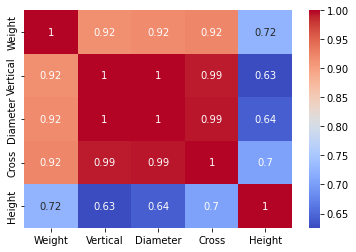

In [3]:
# Correlations Between Variables (-Species)
import seaborn as sea
MyCorr = Fishe.iloc[:, 1:6].corr()
sea.heatmap(MyCorr,
           annot = True,
           cmap = "coolwarm")

##  Specimen Count of Each Species

In [89]:
# Table Count
Count = Fishe["Species"].value_counts()
Count = pd.DataFrame(Count).T
Count

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


[Text(0.5, 1.0, 'Registered Specimen Count')]

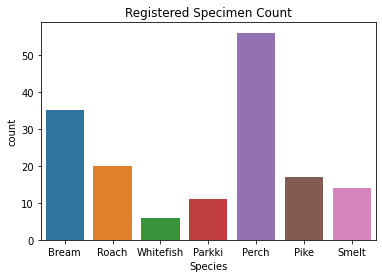

In [68]:
# Count Plot
sea.countplot(data = Fishe,
             x = Fishe["Species"]).set(title='Registered Specimen Count')

## Values Distribution

[Text(0.5, 1.0, 'Weight Distribution')]

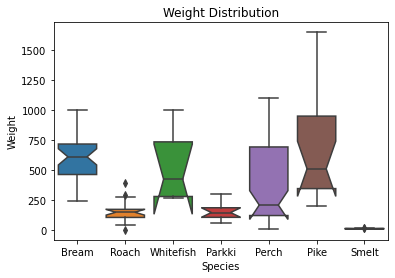

In [75]:
sea.boxplot(data = Fishe, 
            x = "Species", 
            y="Weight",
           notch = True).set(title='Weight Distribution')

[Text(0.5, 1.0, 'Vertical Length Distribution'),
 Text(0, 0.5, 'Vertical Length')]

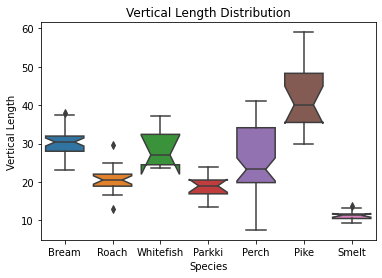

In [80]:
sea.boxplot(data = Fishe, 
            x = "Species", 
            y = "Vertical",
           notch = True).set(title='Vertical Length Distribution',
                            ylabel = "Vertical Length")

[Text(0.5, 1.0, 'Diameter Length Distribution'),
 Text(0, 0.5, 'Diameter Length')]

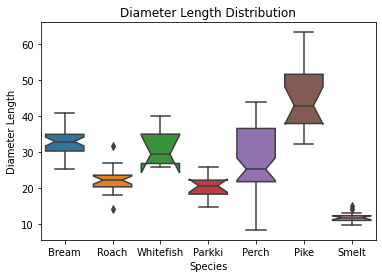

In [81]:
sea.boxplot(data = Fishe, 
            x = "Species", 
            y = "Diameter",
           notch = True).set(title='Diameter Length Distribution',
                            ylabel = "Diameter Length")

[Text(0.5, 1.0, 'Cross Length Distribution'), Text(0, 0.5, 'Cross Length')]

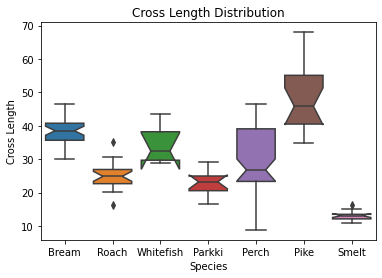

In [82]:
sea.boxplot(data = Fishe, 
            x = "Species", 
            y = "Cross",
           notch = True).set(title='Cross Length Distribution',
                            ylabel = "Cross Length")

# Linear Regression Model 

## Data Preprocessing

In [10]:
# Data Partitioning Preparation
from matplotlib.pyplot import ylim
X = Fishe.iloc[:, 2:5]
y = Fishe["Weight"]

# Data Partitioning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)

## Model Creation 

In [11]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
MyModel = Regression.fit(X_train,y_train)
print("Intercept:", MyModel.intercept_)
print("Slope:", MyModel.coef_)

Intercept: -473.8812237761917
Slope: [-75.31413532  89.34449281   9.90734155]


## Prediction and Evaluation from Model

In [12]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred = MyModel.predict(X_test)
print("R^2:", r2_score(y_test, y_pred))

R^2: 0.8865103929899906


## Model Visualization

Text(0.5, 1.0, 'Predicted Vertical Length')

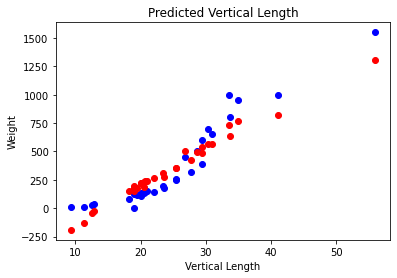

In [16]:
# Model Visuals (Vertical)
import matplotlib.pyplot as matplot
matplot.scatter(X_test["Vertical"], y_test, color = "blue")
matplot.scatter(X_test["Vertical"], y_pred, color = "red")
matplot.xlabel("Vertical Length")
matplot.ylabel("Weight")
matplot.title("Predicted Vertical Length")

Text(0, 0.5, 'Weight')

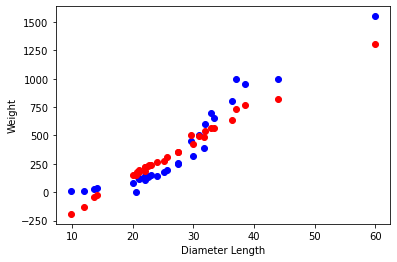

In [14]:
# Model Visuals (Diameter)
matplot.scatter(X_test["Diameter"], y_test, color = "blue")
matplot.scatter(X_test["Diameter"], y_pred, color = "red")
matplot.xlabel("Diameter Length")
matplot.ylabel("Weight")
matplot.title("Predicted Diameter Length")

Text(0, 0.5, 'Weight')

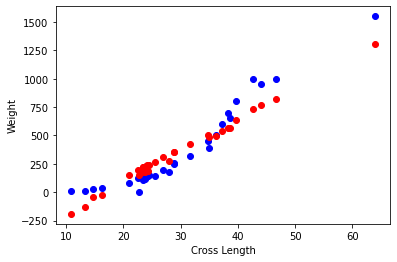

In [15]:
# Model Visuals (Vertical)
matplot.scatter(X_test["Cross"], y_test, color = "blue")
matplot.scatter(X_test["Cross"], y_pred, color = "red")
matplot.xlabel("Cross Length")
matplot.ylabel("Weight")
matplot.title("Predicted Cross Length")